In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mba_decision_dataset.csv',index_col=0, encoding= "utf-8")
df.head() # check the first 5 entries

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
Person ID,,,,,,,,,,,,,,,,,,,
1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
# settings
colors = ['#78C850',
      '#F08030',
      '#6890F0',
      '#A8B820',
      '#A8A878',
      '#A040A0',
      '#F8D030',
      '#EE99AC',
      '#C03028',
      '#F85888',
      '#B8A038',
      '#705898',
      '#98D8D8',
      '#7038F8',
      ]
sns.set_style('darkgrid')

In [57]:
# func

def continuous_var_cut(df,col_name:str,labels=None,colors=None,subplot=False,ax=None):
  df['Count'] = df['Age']
  df_sal_grp = df.groupby([pd.cut(df[col_name],5,labels=labels),
            'Decided to Pursue MBA?'])['Count'].count().reset_index(level='Decided to Pursue MBA?')
  if subplot:
    sns.barplot(data=df_sal_grp,x=col_name,y='Count',hue='Decided to Pursue MBA?',palette=colors,ax=ax)
    #plt.ylabel('Count')
  else:
    plt.figure()
    sns.barplot(data=df_sal_grp,x=col_name,y='Count',hue='Decided to Pursue MBA?',palette=colors)
    #plt.ylabel('Count')

<ipython-input-19-a48dda13a4f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Decided to Pursue MBA?',palette=colors)
<ipython-input-19-a48dda13a4f9>:3: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Decided to Pursue MBA?',palette=colors)
<ipython-input-19-a48dda13a4f9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Gender',palette=colors)
<ipython-input-19-a48dda13a4f9>:8: UserWarning: The palette list has more values (14) than needed (3), which may not be intended.
  sns.countplot(data=df,x='Gender',palette=colors)


Text(0.5, 1.0, 'Gender')

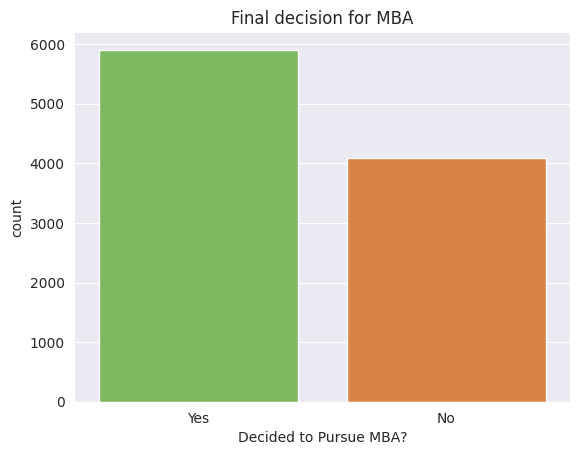

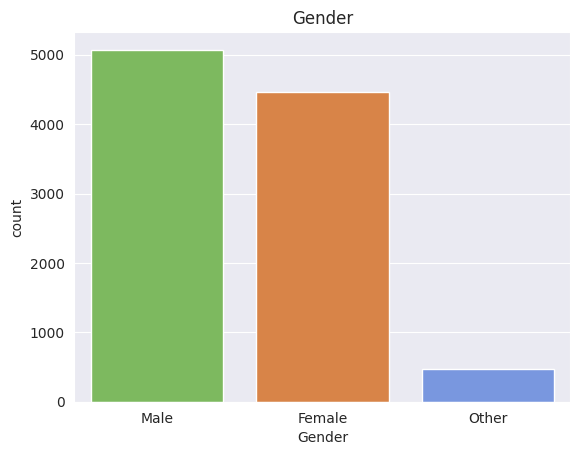

In [ ]:
# barplot for the target
plt.figure()
sns.countplot(data=df,x='Decided to Pursue MBA?',palette=colors)
plt.title('Final decision for MBA')

# barplot for gender
plt.figure()
sns.countplot(data=df,x='Gender',palette=colors)
plt.title('Gender')

<Axes: xlabel='Years of Work Experience', ylabel='Density'>

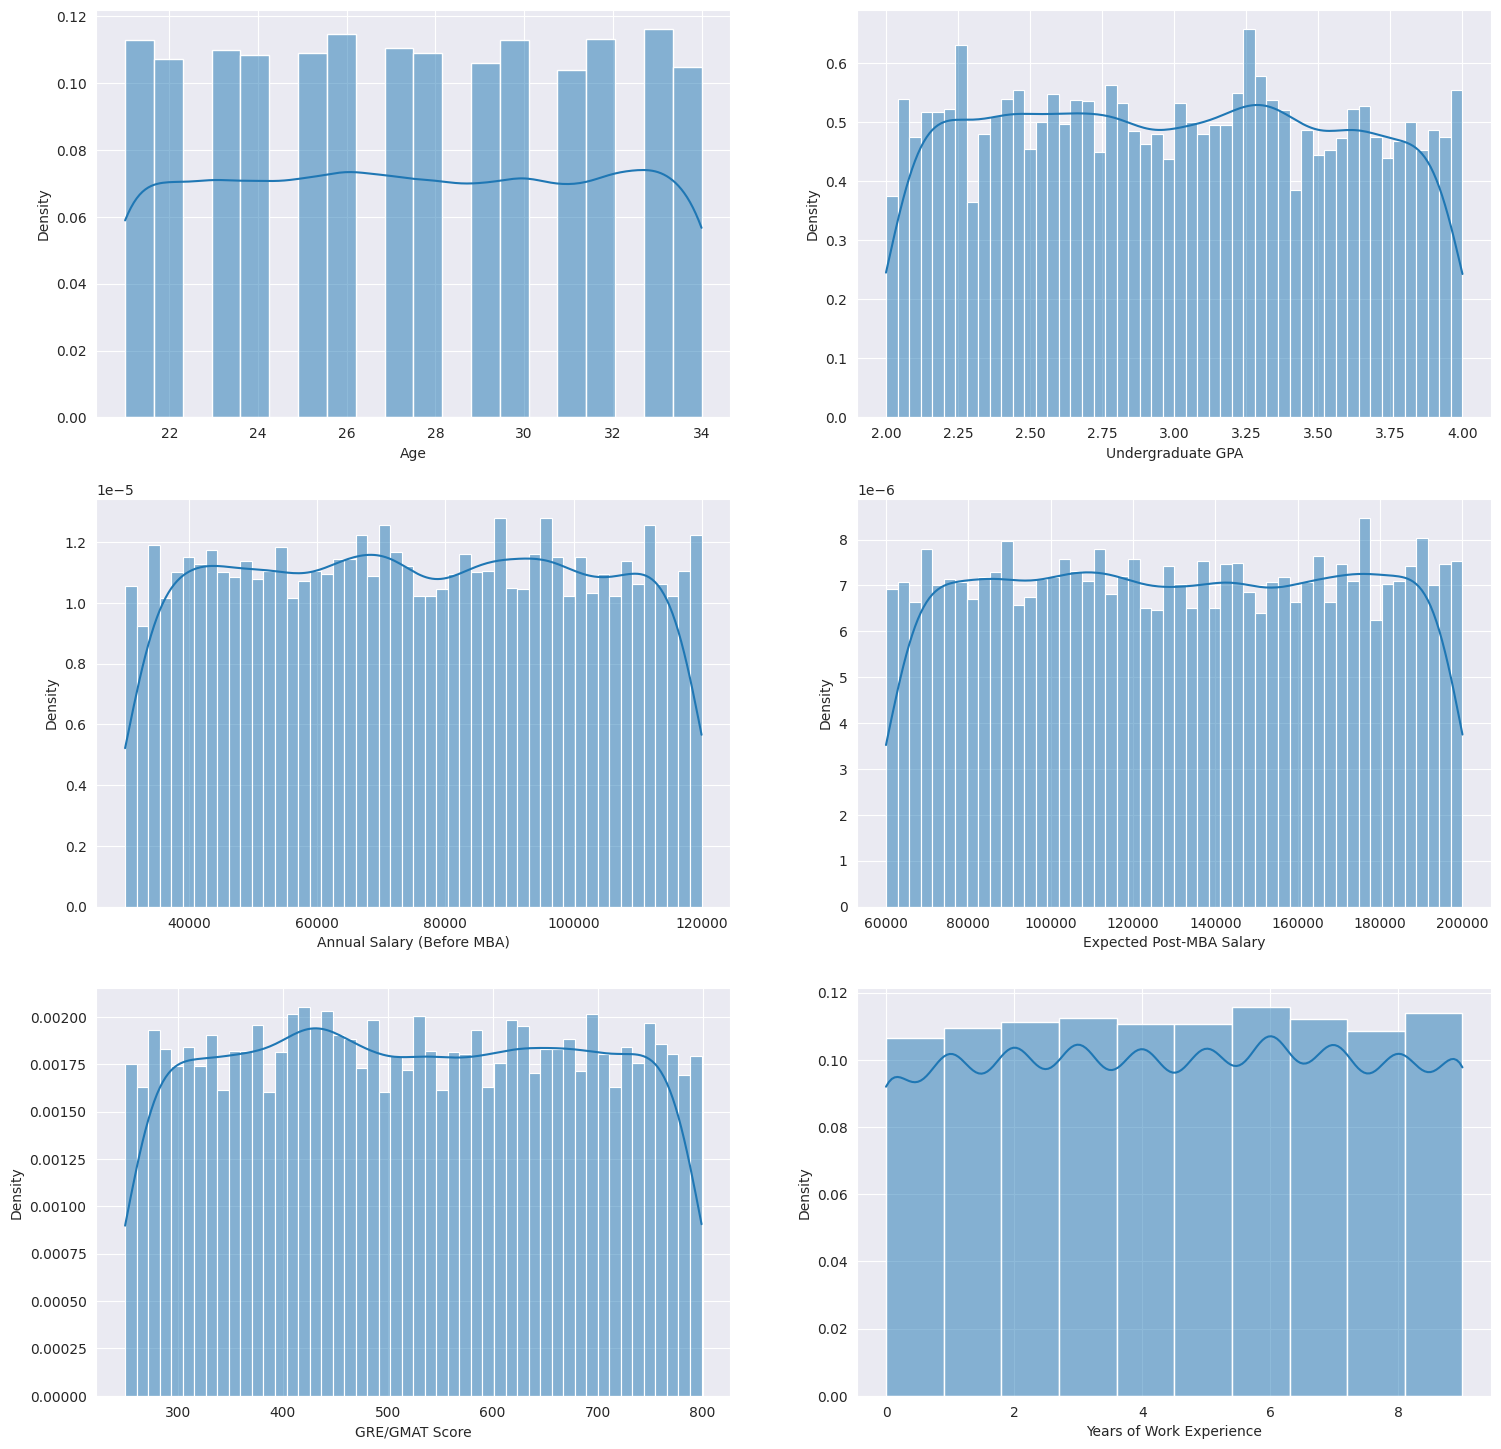

In [ ]:
# distributions for some features
fig,ax = plt.subplots(3,2,figsize = (18,18)) # 3 rows and 2 columns
sns.histplot(data=df,x='Age',kde=True,ax=ax[0,0],stat='density',bins=20)
sns.histplot(data=df,x='Undergraduate GPA',kde=True,ax=ax[0,1],stat='density',bins=50)
sns.histplot(data=df,x='Annual Salary (Before MBA)',kde=True,ax=ax[1,0],stat='density',bins=50)
sns.histplot(data=df,x='Expected Post-MBA Salary',kde=True,ax=ax[1,1],stat='density',bins=50)
sns.histplot(data=df,x='GRE/GMAT Score',kde=True,ax=ax[2,0],stat='density',bins=50)
sns.histplot(data=df,x='Years of Work Experience',kde=True,ax=ax[2,1],stat='density',bins=10)

<ipython-input-20-a642b9e4b9a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df,x='Decided to Pursue MBA?',col='Gender',palette=colors,kind='count')
<ipython-input-20-a642b9e4b9a5>:3: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.catplot(data=df,x='Decided to Pursue MBA?',col='Gender',palette=colors,kind='count')


<Figure size 640x480 with 0 Axes>

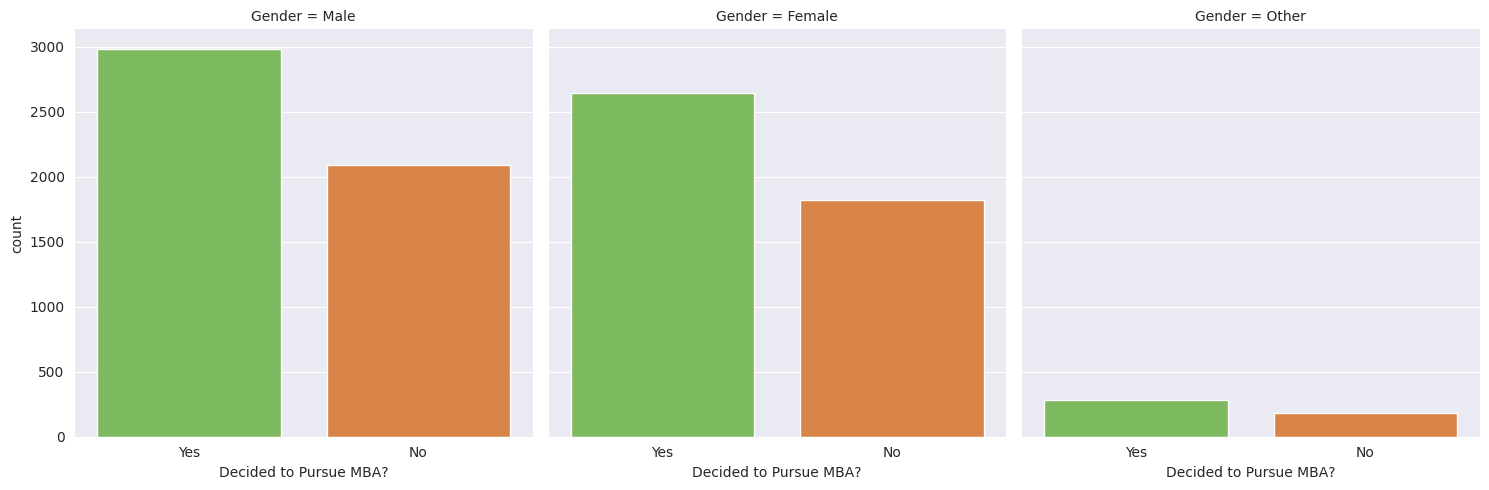

In [ ]:
# gender count for different decisions
plt.figure()
sns.catplot(data=df,x='Decided to Pursue MBA?',col='Gender',palette=colors,kind='count')

<ipython-input-19-50ac2955040e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Years of Work Experience',y='Annual Salary (Before MBA)',palette=colors)
<ipython-input-19-50ac2955040e>:3: UserWarning: The palette list has more values (14) than needed (10), which may not be intended.
  sns.violinplot(data=df,x='Years of Work Experience',y='Annual Salary (Before MBA)',palette=colors)


<Axes: xlabel='Years of Work Experience', ylabel='Annual Salary (Before MBA)'>

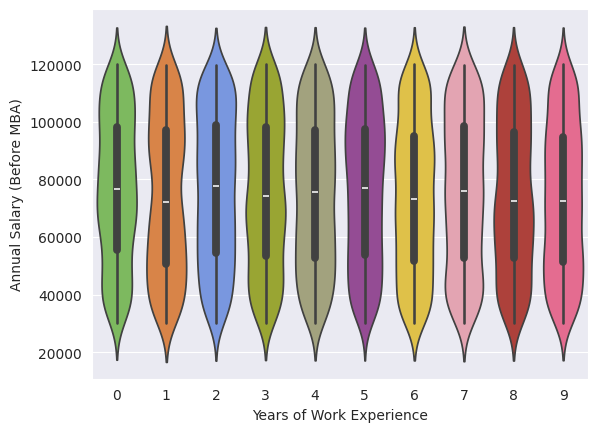

In [ ]:
# annual salary vs years of work experience
plt.figure()
sns.violinplot(data=df,x='Years of Work Experience',y='Annual Salary (Before MBA)',palette=colors)


<ipython-input-7-cd942feba6b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Annual Salary (Before MBA)',palette=colors,ax=ax[0,0]) # annual salary vs decisions
<ipython-input-7-cd942feba6b2>:6: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Annual Salary (Before MBA)',palette=colors,ax=ax[0,0]) # annual salary vs decisions
<ipython-input-7-cd942feba6b2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Age',palette=colors,ax=ax[0,1]) # age vs decsision
<ipython-input-7-cd942feba6b2>:7: UserWarning: The pa

<Axes: xlabel='Decided to Pursue MBA?', ylabel='salary_diff'>

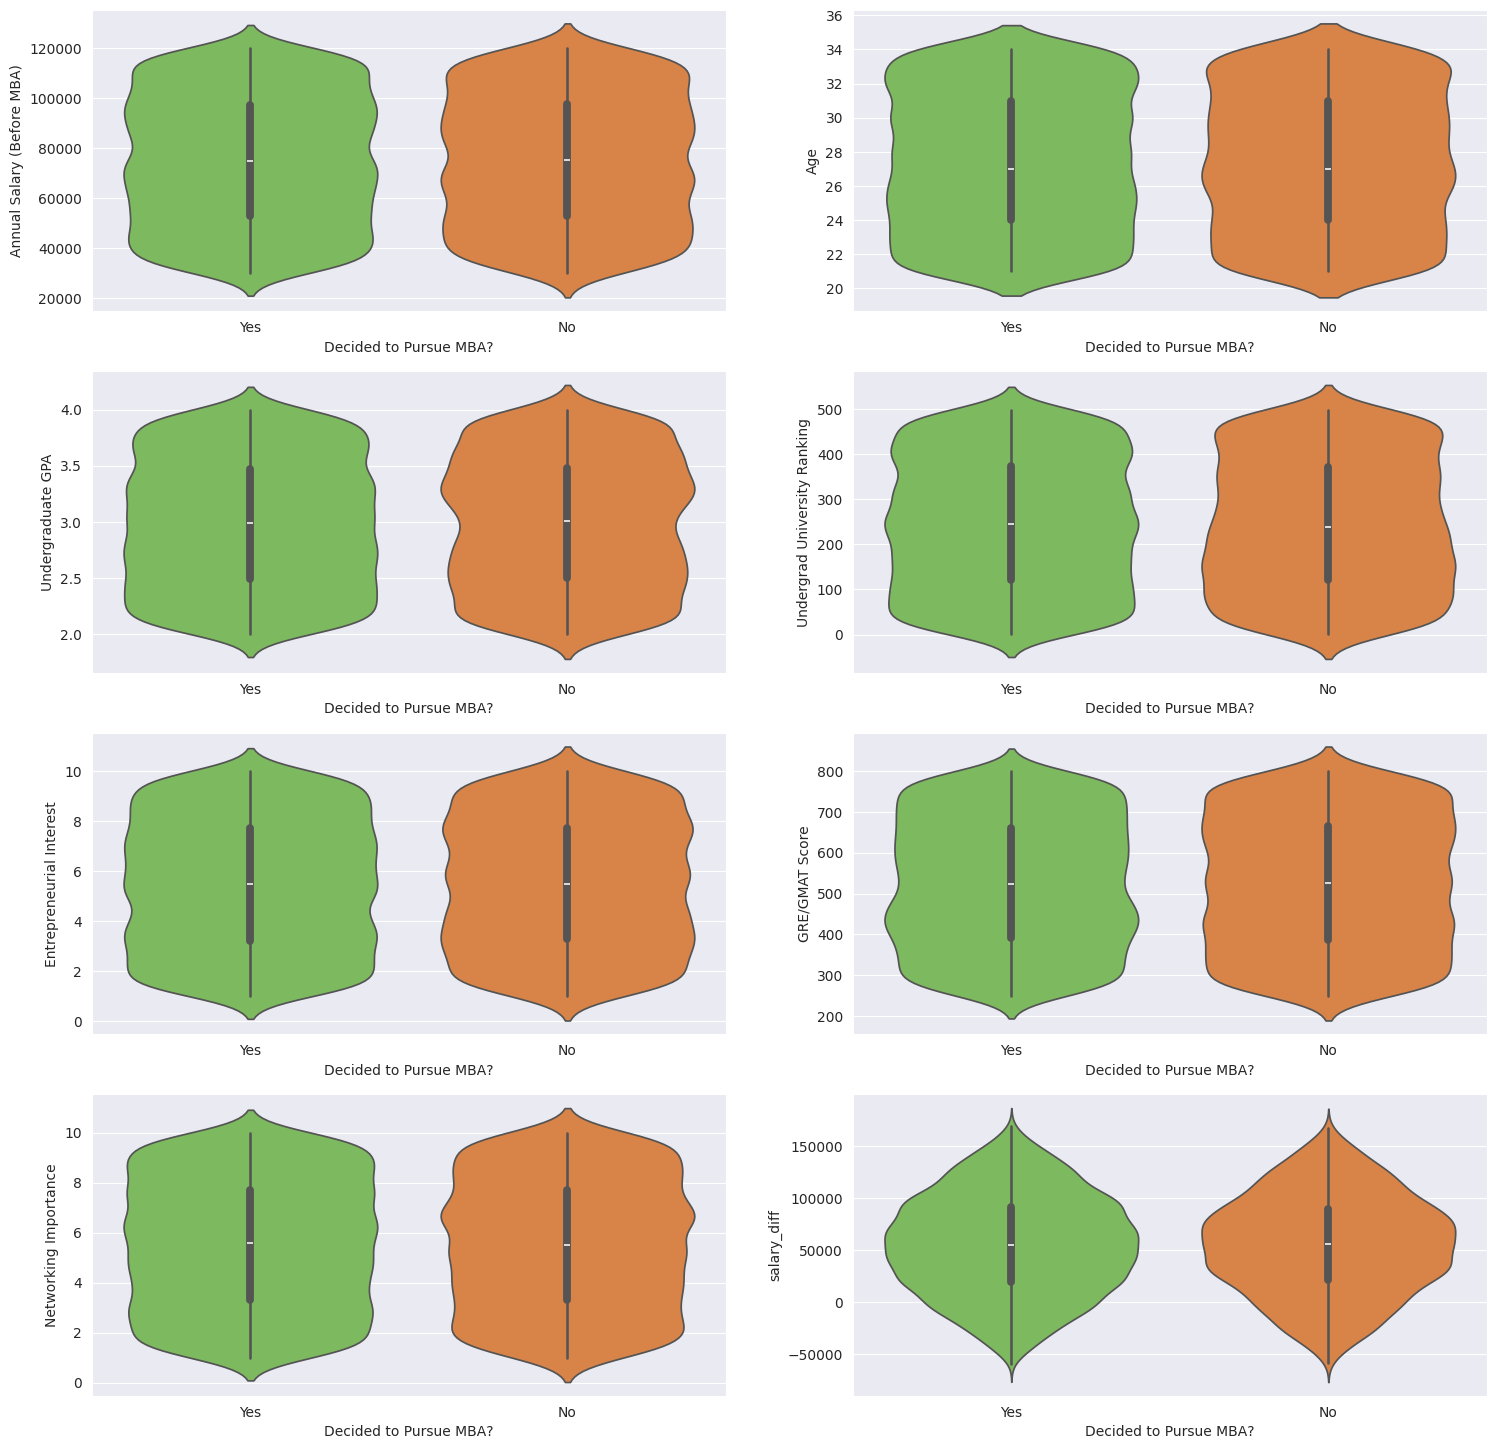

In [7]:
# various features vs decision
df['salary_diff'] = df['Expected Post-MBA Salary']-df['Annual Salary (Before MBA)']

fig,ax = plt.subplots(4,2,figsize = (18,18)) # 3 rows and 2 columns

sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Annual Salary (Before MBA)',palette=colors,ax=ax[0,0]) # annual salary vs decisions
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Age',palette=colors,ax=ax[0,1]) # age vs decsision
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Undergraduate GPA',palette=colors,ax=ax[1,0]) # GPA vs decsision
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Undergrad University Ranking',palette=colors,ax=ax[1,1]) # Undergrad university ranking vs decsision
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Entrepreneurial Interest',palette=colors,ax=ax[2,0]) # Entrepreneurial Interest vs decsision
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='GRE/GMAT Score',palette=colors,ax=ax[2,1]) # GRE/GMAT Score vs decsision
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='Networking Importance',palette=colors,ax=ax[3,0]) # Networking Importance vs decsision
sns.violinplot(data=df,x='Decided to Pursue MBA?',y='salary_diff',palette=colors,ax=ax[3,1]) # salary difference before and after MBA vs decsision

#sns.boxplot(data=df,x='Decided to Pursue MBA?',y='Annual Salary (Before MBA)',palette=colors)

<ipython-input-65-3ff77c0f1966>:3: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.countplot(data=df,x='MBA Funding Source',hue='Decided to Pursue MBA?',palette=colors,ax=ax[0,0],dodge=True) # MBA funding source vs decision
<ipython-input-65-3ff77c0f1966>:4: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Current Job Title',hue='Decided to Pursue MBA?',palette=colors,ax=ax[0,1],dodge=True) # Current Job Title vs decision
<ipython-input-65-3ff77c0f1966>:5: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Undergraduate Major',hue='Decided to Pursue MBA?',palette=colors,ax=ax[1,0],dodge=True) # Undergraduate Major vs decision
<ipython-input-65-3ff77c0f1966>:6: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Desired Post

<Axes: xlabel='Online vs. On-Campus MBA', ylabel='count'>

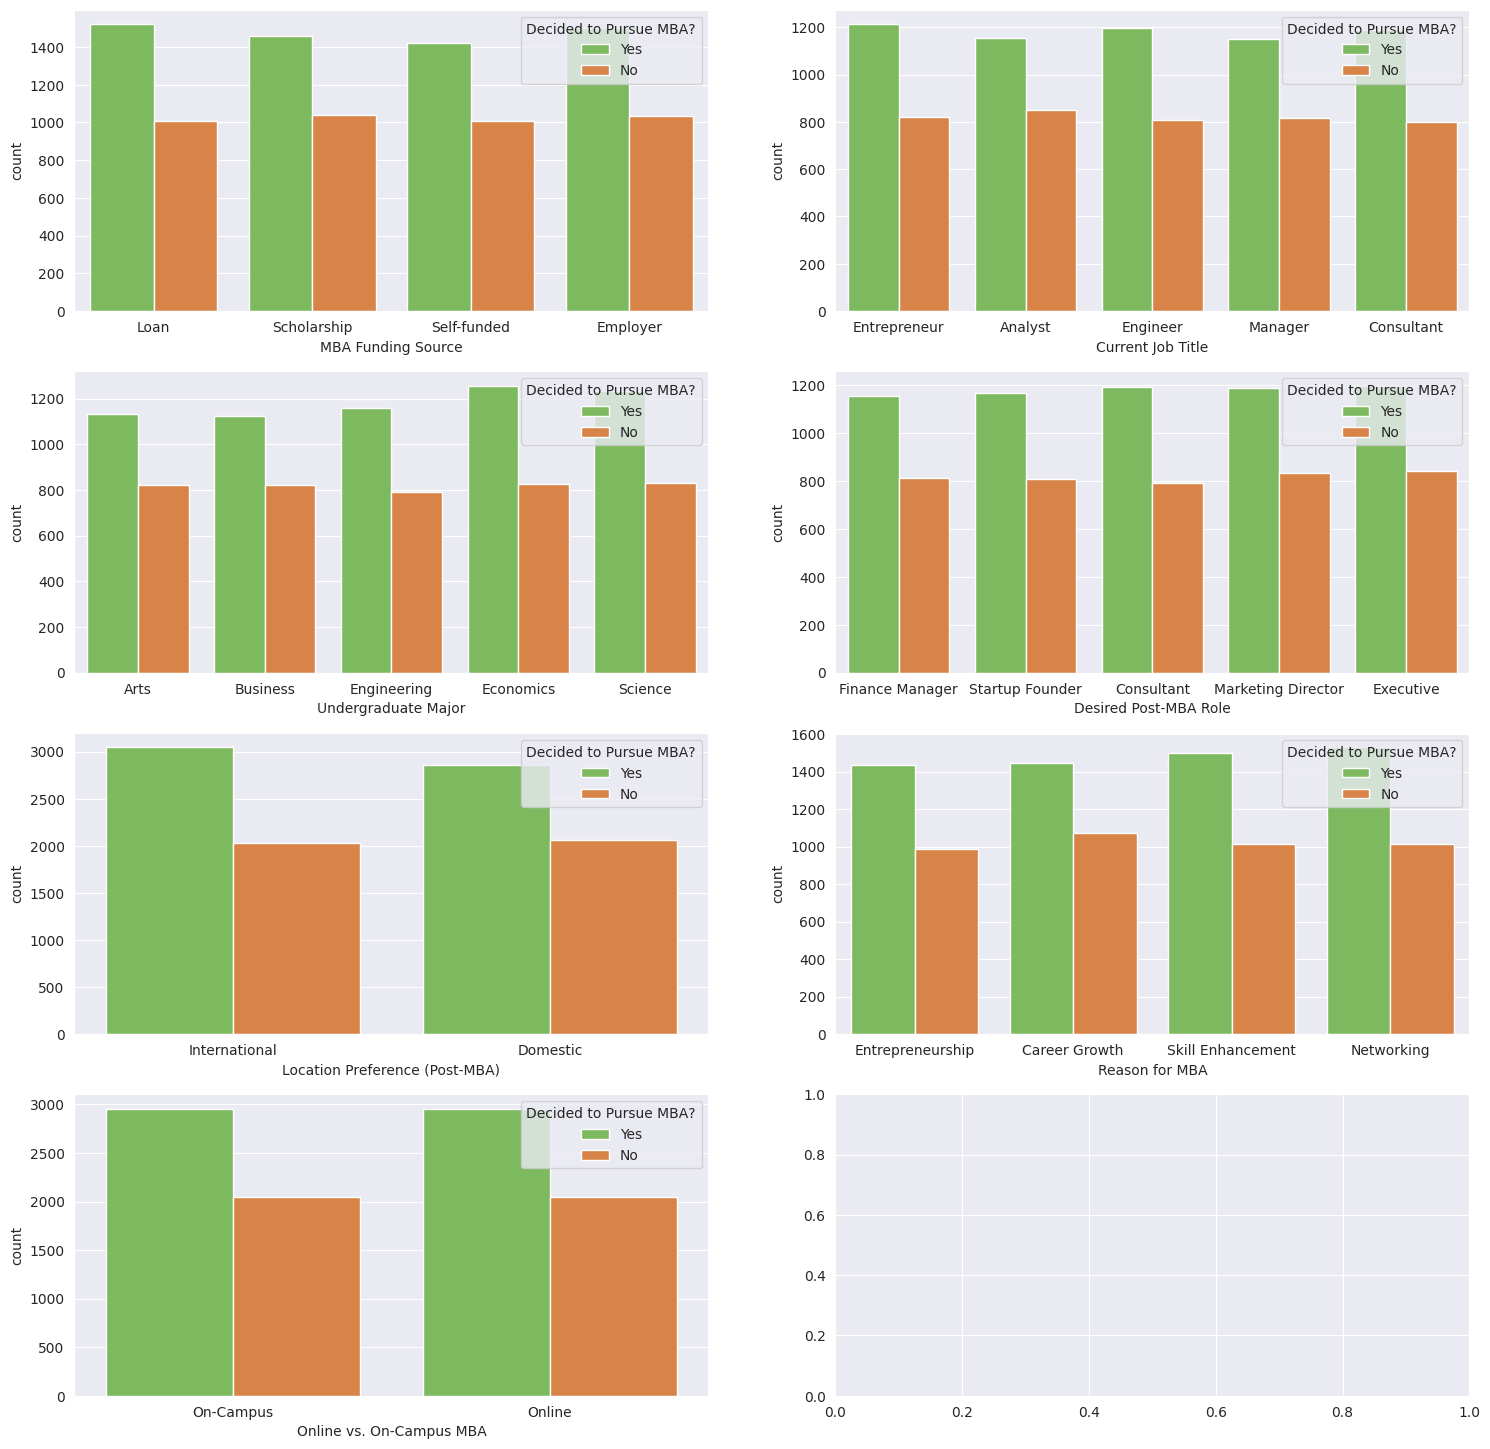

In [65]:
# discrete features vs decision
fig,ax = plt.subplots(4,2,figsize = (18,18)) # 3 rows and 2 columns
sns.countplot(data=df,x='MBA Funding Source',hue='Decided to Pursue MBA?',palette=colors,ax=ax[0,0],dodge=True) # MBA funding source vs decision
sns.countplot(data=df,x='Current Job Title',hue='Decided to Pursue MBA?',palette=colors,ax=ax[0,1],dodge=True) # Current Job Title vs decision
sns.countplot(data=df,x='Undergraduate Major',hue='Decided to Pursue MBA?',palette=colors,ax=ax[1,0],dodge=True) # Undergraduate Major vs decision
sns.countplot(data=df,x='Desired Post-MBA Role',hue='Decided to Pursue MBA?',palette=colors,ax=ax[1,1],dodge=True) # Desired Post-MBA Role vs decision
sns.countplot(data=df,x='Location Preference (Post-MBA)',hue='Decided to Pursue MBA?',palette=colors,ax=ax[2,0],dodge=True) # Location Preference (Post-MBA) vs decision
sns.countplot(data=df,x='Reason for MBA',hue='Decided to Pursue MBA?',palette=colors,ax=ax[2,1],dodge=True) # Reason for MBA vs decision
sns.countplot(data=df,x='Online vs. On-Campus MBA',hue='Decided to Pursue MBA?',palette=colors,ax=ax[3,0],dodge=True) # Online vs. On-Campus MBA vs decision



<ipython-input-57-6fee9dd8cb4f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sal_grp = df.groupby([pd.cut(df[col_name],5,labels=labels),
<ipython-input-57-6fee9dd8cb4f>:6: UserWarning: The palette list has more values (14) than needed (2), which may not be intended.
  sns.barplot(data=df_sal_grp,x=col_name,y='Count',hue='Decided to Pursue MBA?',palette=colors,ax=ax)
<ipython-input-57-6fee9dd8cb4f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sal_grp = df.groupby([pd.cut(df[col_name],5,labels=labels),
<ipython-input-57-6fee9dd8cb4f>:6: UserWarning: The palette list has more values (14) than neede

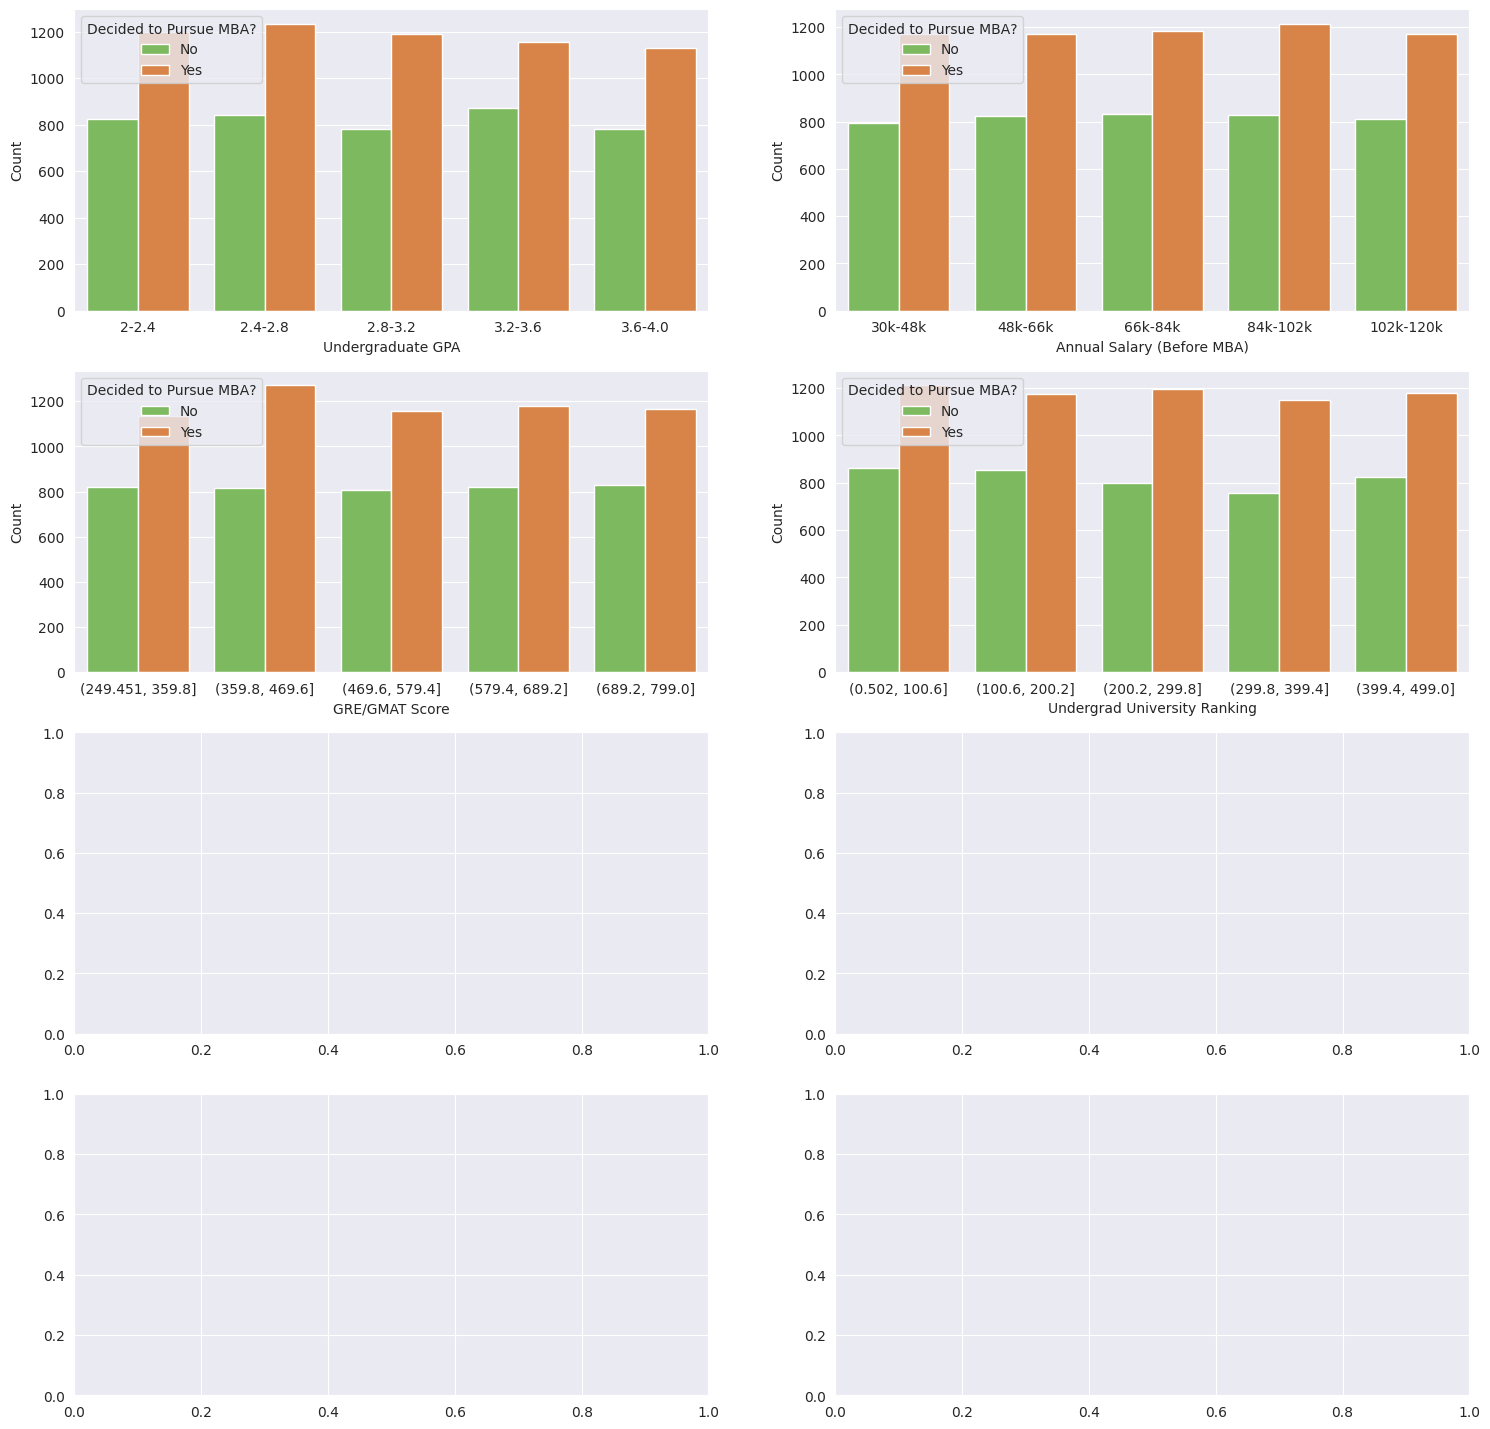

In [63]:
fig,ax = plt.subplots(4,2,figsize = (18,18)) # 3 rows and 2 columns
continuous_var_cut(df,'Undergraduate GPA',labels=['2-2.4','2.4-2.8','2.8-3.2','3.2-3.6','3.6-4.0'],subplot=True,colors=colors,ax=ax[0,0])
continuous_var_cut(df,'Annual Salary (Before MBA)',labels=['30k-48k','48k-66k','66k-84k','84k-102k','102k-120k'],colors=colors,subplot=True,ax=ax[0,1])
continuous_var_cut(df,'GRE/GMAT Score',labels=None,subplot=True,colors=colors,ax=ax[1,0])
continuous_var_cut(df,'Undergrad University Ranking',labels=None,subplot=True,colors=colors,ax=ax[1,1])
